# Recommender Systems

Import libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [35]:
df1 = pd.read_csv('phone_user_review_file_1.csv', encoding='latin-1')
df2 = pd.read_csv('phone_user_review_file_2.csv', encoding='latin-1')
df3 = pd.read_csv('phone_user_review_file_3.csv', encoding='latin-1')
df4 = pd.read_csv('phone_user_review_file_4.csv', encoding='latin-1')
df5 = pd.read_csv('phone_user_review_file_5.csv', encoding='latin-1')
df6 = pd.read_csv('phone_user_review_file_6.csv', encoding='latin-1')

In [36]:
frames = [df1, df2, df3, df4, df5, df6]
df = pd.concat(frames)

Concat each dataframes

In [37]:
df.shape

(1415133, 11)

Total 1412133 rows and 11 columns are in dataset.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


df.info() function is used to print a concise summary of a DataFrame

Observation :

data types in this datasets are object and float.

In [39]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

Observation :
    
Null values are founded in 'score','score_max','extract','author' and 'product' columns.

In [40]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [41]:
df['score'] = df['score'].fillna(df['score'].mean()) 

Fill null values of 'score' column with mean of 'score' column.

In [42]:
df['score_max'] = df['score_max'].fillna(df['score_max'].mean()) 

Fill null values of 'score_max' column with mean of 'score_max' column.

In [43]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

extract,author andproduct columns are not numeric so we can not replace null values of those column by their mean.

In [44]:
df = df.dropna(axis='rows')

remove that rows where there is null value founded in row.

In [45]:
df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

Now there is no any null values in any column.

In [46]:
df.shape

(1336416, 11)

Now total 1336416 rows and 11 columns are in dataset

In [47]:
df = df.sample(n=1000000, random_state=612)

Take only 1000000 rows from the dataset randomly. 

In [48]:
df = df.reset_index(drop=True)
df

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/apple-iphone-5s/,3/31/2014,ru,ru,Yandex,market.yandex.ru,8.0,10.0,ÐÐ¸ÑÐµÐ³Ð¾ ÑÐ²ÐµÑÑ ÐºÑÑÑÐ¾Ð³Ð¾ Ð² appl...,ÐÑÐ½Ð´Ð°ÑÐµÐ² Ð¡ÐµÑÐ³ÐµÐ¹,Apple iPhone 5S 32Gb
1,/cellphones/samsung-galaxy-s3-mini/,9/11/2016,de,de,Amazon,amazon.de,10.0,10.0,Handy ladet nur wenn ich Akku herausnehme wie ...,Rosemarie Boeshans,"Samsung Galaxy S3 mini I8190 Smartphone (10,2 ..."
2,/cellphones/huawei-honor-4x/,5/28/2015,it,it,Amazon,amazon.it,10.0,10.0,"Ottimo prodotto, a questo prezzo non esiste ni...",Federico Minetti,"Honor 4X Smartphone 4G, Display 5.5 Pollici, P..."
3,/cellphones/samsung-galaxy-j1-mini/,8/6/2016,pt,br,Kabum,kabum.com.br,10.0,10.0,Ãtima relaÃ§Ã£o custo benefÃ­cio.,EugÃªnio,Smartphone Samsung Galaxy J1 Mini Duos SM-J105...
4,/cellphones/samsung-wave-ii-s8530/,7/1/2011,en,gb,Amazon,amazon.co.uk,10.0,10.0,It is a great phone. But not a smart phone. Th...,AH Kamalati,Samsung Wave 2 S8530 Sim Free Mobile Smart Pho...
...,...,...,...,...,...,...,...,...,...,...,...
999995,/cellphones/samsung-galaxy-grand-duos-i9080-i9...,10/6/2014,pt,br,Submarino,submarino.com.br,8.0,10.0,JÃ¡ possuia um e comprei este para minha irmÃ£...,Suelen Araripe,Samsung Smartphone Samsung Galaxy Gran Duos GT...
999996,/cellphones/samsung-galaxy-s4-mini-gt-i9190-gt...,10/19/2013,es,es,Amazon,amazon.es,6.0,10.0,"es util si tambÃ© tens tauletes samsung, no m'...",isidre viÃ±as,Samsung S4 Mini - Smartphone libre (pantalla 4...
999997,/cellphones/samsung-galaxy-s-iii/,4/14/2014,en,us,Samsung,samsung.com,10.0,10.0,"When I first got this when renewing contract, ...",skinnyguy,Samsung Galaxy S III 16GB (Sprint)
999998,/cellphones/nokia-lumia-630/,8/28/2014,en,gb,Amazon,amazon.co.uk,10.0,10.0,Quality phone if you like Windows 8 you will l...,just me,Microsoft Nokia Lumia 630 UK SIM-Free Smartpho...


#### Identify the most rated features

In [49]:
feature_df = df.explode('product')
feature_count = feature_df['product'].value_counts()
top_features = feature_count.head(10)
print(top_features)

Lenovo Vibe K4 Note (White,16GB)                3835
Lenovo Vibe K4 Note (Black, 16GB)               3275
OnePlus 3 (Graphite, 64 GB)                     3097
OnePlus 3 (Soft Gold, 64 GB)                    2673
Samsung Galaxy Express I8730                    2009
Huawei P8lite zwart / 16 GB                     1973
Lenovo Vibe K5 (Gold, VoLTE update)             1906
Samsung Galaxy S6 zwart / 32 GB                 1756
Lenovo Vibe K5 (Grey, VoLTE update)             1556
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)    1463
Name: product, dtype: int64


Observation :
    
A new DataFrame with each feature as a separate row    

The number of times each feature is mentioned in the reviews

The result in descending order and return the top 10 most mentioned features

#### Identify the users with most number of reviews

In [50]:
user_review_count = df.groupby('author')['score'].count()
top_reviewers = user_review_count.sort_values(ascending=False).head(10)
print(top_reviewers)

author
Amazon Customer    57643
Cliente Amazon     14458
e-bit               6492
Client d'Amazon     5803
Amazon Kunde        3545
Anonymous           1960
einer Kundin        1951
einem Kunden        1421
unknown             1308
Anonymous           1115
Name: score, dtype: int64


Observation :
    
Grouping the reviews by user_id and count the number of reviews per user

Sorting the result in descending order and return the top 10 users with the most reviews

#### Select the data with having more than 50 ratings and users who have given more than 50 ratings. report the final shape of dataset

In [51]:
author_counts = df['author'].value_counts()
product_counts = df['product'].value_counts()

Observation :
    
Counting the number of ratings per author and product

In [52]:
popular_author = author_counts[author_counts > 50].index
popular_product = product_counts[product_counts > 50].index
popular_ratings = df[df['author'].isin(popular_author) & df['product'].isin(popular_product)]

Observation :
    
Filtering the data to keep only the ratings with more than 50 counts

In [53]:
user_ratings = popular_ratings.groupby('author').size()
frequent_users = user_ratings[user_ratings > 50].index
final_data = popular_ratings[popular_ratings['author'].isin(frequent_users)]

Observation :

Filtering the data to keep only the users who have given more than 50 ratings.

In [54]:
final_data

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
8,/cellphones/apple-iphone-5s/,12/20/2013,en,us,Amazon,amazon.com,2.0,10.0,I bought this phone and it is NOT a new produc...,Tom,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,..."
10,/cellphones/samsung-galaxy-s-iii/,9/10/2012,en,gb,Amazon,amazon.co.uk,6.0,10.0,Not excellent condition was ok condition few t...,Amazon Customer,Samsung Galaxy SIII UK SIM-Free Smartphone - P...
21,/cellphones/samsung-galaxy-a3-2016/,1/21/2016,it,it,Amazon,amazon.it,8.0,10.0,Un prodotto veramente ottimo in rapporto al pr...,Cliente Amazon,Samsung Galaxy A3 (2016) 16GB White
82,/cellphones/samsung-galaxy-a5-2016/,1/29/2017,it,it,Amazon,amazon.it,10.0,10.0,Uno dei migliori come qualitÃ prezzo. Bello e...,Cliente Amazon,"Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero"
101,/cellphones/lenovo-vibe-k4-note/,2/5/2016,en,in,Amazon,amazon.in,10.0,10.0,What a nic phone it is,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"
...,...,...,...,...,...,...,...,...,...,...,...
999972,/cellphones/blackberry-q10/,7/13/2013,en,gb,Amazon,amazon.co.uk,8.0,10.0,"in good nick,does the job well",Amazon Customer,BlackBerry Q10 SIM-Free Smartphone - White
999975,/cellphones/samsung-galaxy-grand-prime-ve-sm-g...,2/20/2016,pt,br,Bondfaro,bondfaro.com.br,10.0,10.0,ACHEI MUITO BOM E BONITO,e-bit,Smartphone Samsung Galaxy Gran Prime SM-G531
999979,/cellphones/lenovo-vibe-k4-note/,2/6/2016,en,in,Amazon,amazon.in,6.0,10.0,"too much heating problem, battery back up also...",Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)"
999985,/cellphones/motorola-moto-g3/,9/21/2015,en,in,Amazon,amazon.in,2.0,10.0,it get to hot and I couldn't touch it and it w...,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 8GB)"


In [55]:
print(final_data.shape)

(95807, 11)


#### Build a popularity based model and recommend top 5 mobile phones.

In [56]:
phone_popularity = df.groupby('product')['score'].count().reset_index(name='popularity')
top_phones = phone_popularity.sort_values('popularity', ascending=False).head(5)
print(top_phones)

                                 product  popularity
21763   Lenovo Vibe K4 Note (White,16GB)        3835
21762  Lenovo Vibe K4 Note (Black, 16GB)        3275
31846        OnePlus 3 (Graphite, 64 GB)        3097
31847       OnePlus 3 (Soft Gold, 64 GB)        2673
37478       Samsung Galaxy Express I8730        2009


Observation :

Grouping the data by phone name and count the number of ratings for each phone

Recommanding the top 5 phones based on their popularity

#### Build collobrative filtering model using SVD from suprise or build it from scratch.( Note : Incase you are building from scratch you can limit your data points to 5000 samples if you face memory issues.)Build collobrative filtering model using knn with means from suprise.You can try both user-based and item-based model.

In [275]:
df['author'].value_counts()

Amazon Customer    57643
Cliente Amazon     14458
e-bit               6492
Client d'Amazon     5803
Amazon Kunde        3545
                   ...  
Lisa Pretty            1
magicabula             1
Werking reviews        1
shauna traynor         1
skinnyguy              1
Name: author, Length: 617917, dtype: int64

Observation :
    
Count how many times a single user score on any product

In [276]:
df['author'].value_counts().shape

(617917,)

Total unique authors in entire dataset.

In [277]:
x = df['author'].value_counts() > 100

If any author gives score more than 100 times on any product store them in x.

In [278]:
x

Amazon Customer     True
Cliente Amazon      True
e-bit               True
Client d'Amazon     True
Amazon Kunde        True
                   ...  
Lisa Pretty        False
magicabula         False
Werking reviews    False
shauna traynor     False
skinnyguy          False
Name: author, Length: 617917, dtype: bool

In [279]:
x[x]

Amazon Customer    True
Cliente Amazon     True
e-bit              True
Client d'Amazon    True
Amazon Kunde       True
                   ... 
Nicolas            True
dal07              True
dolunay            True
Aksisey            True
Anonym             True
Name: author, Length: 281, dtype: bool

Apply boolean indexing.

Note : Boolean indexing is used to filter data through the use of boolean vectors. 

In [280]:
y = x[x].index
y

Index(['Amazon Customer', 'Cliente Amazon', 'e-bit', 'Client d'Amazon',
       'Amazon Kunde', 'Anonymous', 'einer Kundin', 'einem Kunden', 'unknown',
       'Anonymous ',
       ...
       'Ali', 'Julia', 'salame', 'ÐÐ²Ð³ÐµÐ½Ð¸Ñ', 'Mary', 'Nicolas', 'dal07',
       'dolunay', 'Aksisey', 'Anonym'],
      dtype='object', length=281)

Store the name of those authors in y

In [281]:
duplicate_df = df[df['author'].isin(y)]
duplicate_df

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
7,/cellphones/google-nexus-6/,2/4/2016,en,ca,Amazon,amazon.ca,10.0,10.0,The phone was shipped very quickly and arrived...,Richard,Nexus Motorola Nexus 6 - 64GB - Unlocked Phone...
8,/cellphones/apple-iphone-5s/,12/20/2013,en,us,Amazon,amazon.com,2.0,10.0,I bought this phone and it is NOT a new produc...,Tom,"Apple iPhone 5s GSM Unlocked Cellphone, 16 GB,..."
10,/cellphones/samsung-galaxy-s-iii/,9/10/2012,en,gb,Amazon,amazon.co.uk,6.0,10.0,Not excellent condition was ok condition few t...,Amazon Customer,Samsung Galaxy SIII UK SIM-Free Smartphone - P...
21,/cellphones/samsung-galaxy-a3-2016/,1/21/2016,it,it,Amazon,amazon.it,8.0,10.0,Un prodotto veramente ottimo in rapporto al pr...,Cliente Amazon,Samsung Galaxy A3 (2016) 16GB White
56,/cellphones/samsung-galaxy-s7-edge/,2/8/2017,en,gb,Argos,argos.co.uk,10.0,10.0,I'd like to say that this mobile is best for e...,Ali,Sim Free Samsung Galaxy S7 Edge Mobile Phone -...
...,...,...,...,...,...,...,...,...,...,...,...
999975,/cellphones/samsung-galaxy-grand-prime-ve-sm-g...,2/20/2016,pt,br,Bondfaro,bondfaro.com.br,10.0,10.0,ACHEI MUITO BOM E BONITO,e-bit,Smartphone Samsung Galaxy Gran Prime SM-G531
999979,/cellphones/lenovo-vibe-k4-note/,2/6/2016,en,in,Amazon,amazon.in,6.0,10.0,"too much heating problem, battery back up also...",Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)"
999985,/cellphones/motorola-moto-g3/,9/21/2015,en,in,Amazon,amazon.in,2.0,10.0,it get to hot and I couldn't touch it and it w...,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 8GB)"
999987,/cellphones/motorola-moto-g/,6/29/2014,it,it,Amazon,amazon.it,10.0,10.0,"Ho comprato il primo smartphone Android, il G1...",Fabio,"Lenovo Motorola Moto G Smartphone, 4,5 pollici..."


Observation :
    
Find those data in df where author name is similar to author name in y

In [282]:
duplicate_df.shape

(150788, 11)

Toatal 150788 rows and 11 columns are in duplicate_df

In [283]:
duplicate_df.groupby('product')['score'].count().reset_index()

,product,score
0,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...,11
1,**** PacK Exclusif A&d COFFRET WIKO **** Houss...,1
2,1110 / 1112,1
3,1135,1
4,1st Film de protection d'Ã©cran en Verre tremp...,5
...,...,...
22006,×××¤×× ×¡××××¨× Samsung Galaxy S7 SM-G...,1
22007,×××¤×× ×¡××××¨× Xiaomi Redmi Note 3 Pr...,3
22008,×××¤×× ×¡××××¨× iPhone 5s 16GB SimFree...,1
22009,ãæ¸¬è©¦ãSamsung Wave575 æ ¡åç³» bada æ°æ©,1


Observation :

Groupby duplicate_df on basis of product column and find how many times each product scored.

Here score is number of score

In [284]:
product_pivot = duplicate_df.pivot_table(values='score',
    index='product',
    columns='author', dropna=True).fillna(0)

Observation :
    
Created a pivot table to find distance between products.

In [285]:
from scipy.sparse import csr_matrix

Using sparse matrices to store data that contains a large number of zero-valued elements can both save a significant amount of memory and speed up the processing of that data.

In [286]:
mat_pivot = csr_matrix(product_pivot.values)

In [287]:
print(mat_pivot)

  (0, 10)	6.0
  (0, 12)	10.0
  (0, 19)	10.0
  (0, 46)	7.0
  (0, 84)	10.0
  (0, 104)	10.0
  (0, 130)	10.0
  (0, 140)	10.0
  (1, 129)	8.0
  (2, 222)	10.0
  (3, 222)	10.0
  (4, 45)	9.6
  (5, 132)	10.0
  (6, 151)	10.0
  (7, 15)	10.0
  (7, 119)	2.0
  (8, 15)	7.5
  (9, 12)	10.0
  (9, 15)	8.0
  (10, 222)	10.0
  (11, 222)	3.0
  (12, 222)	4.0
  (13, 222)	9.0
  (14, 222)	8.0
  (15, 15)	8.0
  :	:
  (21994, 248)	8.0
  (21995, 249)	10.0
  (21996, 12)	10.0
  (21997, 57)	10.0
  (21997, 171)	2.0
  (21998, 34)	10.0
  (21998, 51)	10.0
  (21999, 241)	4.0
  (22000, 57)	10.0
  (22000, 171)	2.0
  (22001, 147)	2.0
  (22002, 26)	8.0
  (22002, 50)	10.0
  (22002, 54)	8.0
  (22002, 57)	10.0
  (22002, 129)	8.0
  (22003, 34)	10.0
  (22004, 129)	10.0
  (22005, 195)	10.0
  (22006, 56)	8.0
  (22007, 57)	2.0
  (22007, 170)	6.0
  (22008, 129)	10.0
  (22009, 115)	8.007059551183373
  (22010, 115)	8.007059551183373


In [288]:
from sklearn.neighbors import NearestNeighbors

The nearest neighbor function is the probability distribution of the distance from that point to the nearest or closest neighboring point.

In [289]:
model = NearestNeighbors(metric='cosine',algorithm='auto')
model.fit(mat_movies)

NearestNeighbors(metric='cosine')

Observation :

Cosine similarity is the cosine of the angle between two vectors and it is used as a distance evaluation metric between two points in the plane.

In [290]:
query_index = np.random.choice(product_pivot.shape[0])
print(query_index)
distances, indices = model.kneighbors(product_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

5266


Observation :
    
Take any random product from product_pivot and print nearest neighbors for it.

In [291]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(product_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, product_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for HTC Inspire 4G Unlocked Phone A9192, Black:

1: Samsung Galaxy J1 Ace (Sm-J110H) Duos Dual Sim Quad Band GPS Android Smart Phone (Black) - International Version, with distance of 0.05481930549311498:
2: Microsoft Lumia 640 XL 8GB Unlocked GSM Quad-Core WIndows Smartphone w/ 13MP Camera - Black, with distance of 0.05516533160171999:
3: Nokia 7110 WAP Handy, with distance of 0.06261500491444094:
4: Samsung A847 Rugby 2 (Black) Unlocked, with distance of 0.06261500491444094:
5: Samsung S3570 CH@T357 T??l??phone Mobile Compact Noir, with distance of 0.06261500491444094:


Here,

First Recommender product Samsung Galaxy J1... is near to HTC Inspire 4G... with 0.054 distance and like wise...

#### Evaluate the collobrative model and print RMSE value

In [292]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))

surprise_data = Dataset.load_from_df(df[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.2)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)

rmse = accuracy.rmse(predictions)
print('RMSE:', rmse)


RMSE: 3.9563
RMSE: 3.9562981081170636


The singular value decomposition (SVD) provides way to factorize a matrix, into singular vectors and singular values

Observation :
    
Take the dataset on rating scale and use SVD() and print RMSE value.

Note :
    
Root Mean Squared Error (RMSE)

It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions.

#### Predict the score (average rating) for test user

In [294]:
surprise_data = Dataset.load_from_df(df[['author', 'product', 'score']], reader)
model = SVD()
trainset = surprise_data.build_full_trainset()
model.fit(trainset)
test_user = 12365

Fit model on train set

Take any number from dataset and store it in test_user.

In [84]:
product_number_name = df['product'].iloc[test_user]

Try to find prosuct name of that number by using iloc from main dataframe aand save it in product_number_name. 

In [85]:
product_number_name

'Karbonn A7 Android'

In [86]:
df[df["product"] == product_number_name]['score'].mean()

8.571428571428571

Find all entries in dataset where product_number_name is same and take score of all those dataset and find mean of it.

Observation :

Here, for product name Karbonn A7 Android the average score is 8.57. so the test user may give score on Karbonn A7 Android near to 8.57.

#### Report your findings and inferences

<Axes: >

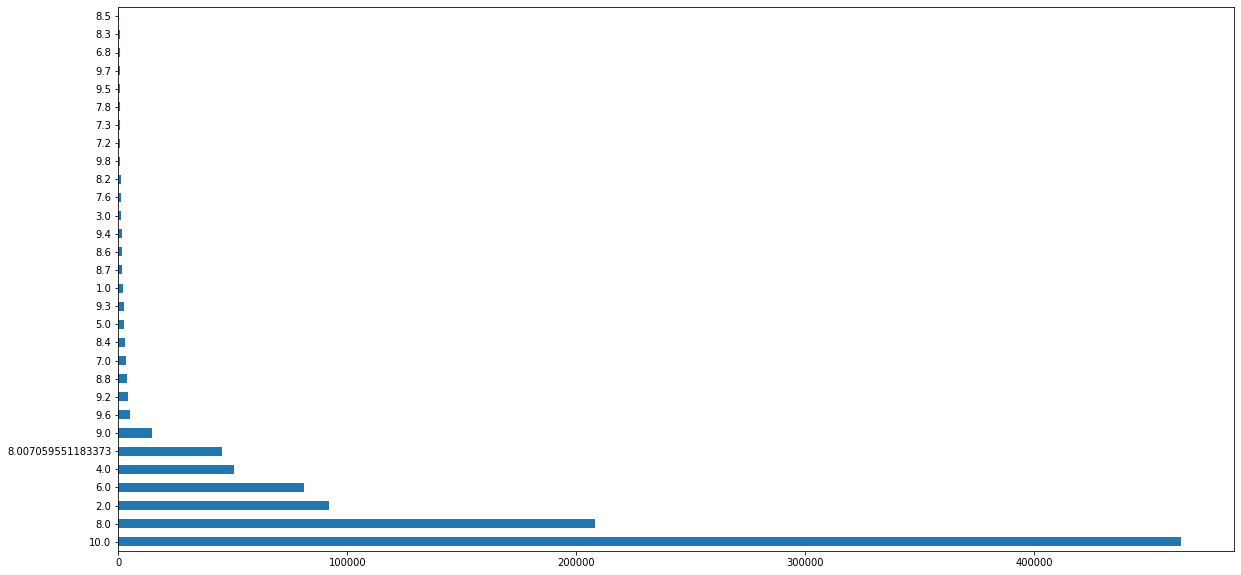

In [368]:
df['score'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

Observation :
    
More than 400000 ratings are 10 so we can not consider any product as a popular.

#### Try to recommend top 5 products for test users

In [90]:
phone_popularity = df.groupby('product')['score'].count().reset_index(name='popularity')

Grouping the data by phone name and count the number of ratings for each phone

In [295]:
top_phones = phone_popularity.sort_values('popularity', ascending=False).head(5)
print(top_phones)

                                 product  popularity
21763   Lenovo Vibe K4 Note (White,16GB)        3835
21762  Lenovo Vibe K4 Note (Black, 16GB)        3275
31846        OnePlus 3 (Graphite, 64 GB)        3097
31847       OnePlus 3 (Soft Gold, 64 GB)        2673
37478       Samsung Galaxy Express I8730        2009


Recommending the top 5 phones based on their popularity

#### Check outliers and impute them as required.

Note : It is difficult to find and impute outliers to entire dataset it may take more time. In this dataset a single product is not reapeating in another dataframe so seperate the datframes and check outliers and impute them indivudialy.

#### df1

In [154]:
df_average_score = df1.groupby('product')['score'].mean().reset_index()

Observation :
    
Find the average value each product of df1 and store them in df_average_score 

In [155]:
df_average_score

,product,score
0,"'Smartphone Meizu Pro 5, 5,7 pouces avec Exyno...",8.000000
1,'Sony Xperia X (F5122) â White â Dual Sim ...,10.000000
2,'Sony Xperia X (F5122) â rosa â Dual Sim (...,10.000000
3,1st Film de protection d'Ã©cran en Verre tremp...,8.827586
4,2015 Newest iNEW V1 5'' IPS Android 4.4 Kitkat...,10.000000
...,...,...
13649,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 2016 SM-J120H -...,10.000000
13650,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 2016 SM-J120H -...,10.000000
13651,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...,6.000000
13652,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...,9.200000


In [156]:
df1_count_ratings = df1.groupby('product').count()['score'].reset_index()

Count number of rating each product get and store it in df1_count_ratings.  

In [157]:
df1_count_ratings.rename(columns = {'score':'Number_of_score'}, inplace = True)

Rename score column with Number_of_score. 

In [158]:
df1_count_ratings

,product,Number_of_score
0,"'Smartphone Meizu Pro 5, 5,7 pouces avec Exyno...",1
1,'Sony Xperia X (F5122) â White â Dual Sim ...,1
2,'Sony Xperia X (F5122) â rosa â Dual Sim (...,1
3,1st Film de protection d'Ã©cran en Verre tremp...,29
4,2015 Newest iNEW V1 5'' IPS Android 4.4 Kitkat...,1
...,...,...
13649,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 2016 SM-J120H -...,1
13650,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 2016 SM-J120H -...,3
13651,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...,1
13652,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...,5


In [159]:
df1_count_ratings.drop(df1_count_ratings[(df1_count_ratings['Number_of_score'] < 5 )].index, inplace=True)

Observation :
    
We can drop those values where number_of_score is less than 5 because if prosuct get ratings less than 5 it is hard to get prediction on it.

In [160]:
df1_count_ratings

,product,Number_of_score
3,1st Film de protection d'Ã©cran en Verre tremp...,29
8,ACCESSD Asus ZenFone 2 (ZE551ML/ZE550KL) 5.5 p...,8
9,ACCESSD SAMSUNG GALAXY J3 2016 Film de protect...,26
10,ACER LIQUID Z6 PLUS BLACK,13
12,"AICEK Coque ASUS ZenFone 2 ZE550ML/ZE551ML, AI...",64
...,...,...
13641,×××¤×× ×¡××××¨× Xiaomi Redmi 3s 32GB,12
13643,×××¤×× ×¡××××¨× Xiaomi Redmi Note 3 Pr...,64
13644,×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 32GB,10
13645,×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 64GB,57


In [161]:
product_name = df1_count_ratings.iloc[0]['product']
product_name

"1st Film de protection d'Ã©cran en Verre trempÃ© pour Samsung Galaxy A3 Transparent"

Observation :
    
Take first product of df1.

In [162]:
product_name_df = df1[df1['product']==product_name]
print(product_name_df.shape)
product_name_df.head(2)

(29, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
164208,/cellphones/samsung-galaxy-a3-2016/,2/8/2016,fr,fr,Amazon,amazon.fr,10.0,10.0,Se pose facilement sur l'Ã©cran du tÃ©lÃ©phone...,martine,1st Film de protection d'Ã©cran en Verre tremp...
164215,/cellphones/samsung-galaxy-a3-2016/,2/7/2016,fr,fr,Amazon,amazon.fr,10.0,10.0,super produit trÃ¨s bonne emballage vraiment r...,bibi,1st Film de protection d'Ã©cran en Verre tremp...


Find those values from df1 where product name is similar to product_name and store it in product_name_df.   

In [163]:
Avg_score = round(product_name_df['score'].mean(), 2)
Avg_score

8.83

Find average value of those product's all score

In [164]:
print(product_name_df[product_name_df['score'] < Avg_score]['score'])

164260    8.0
164325    2.0
164464    2.0
164472    8.0
164481    8.0
164482    2.0
164483    8.0
164486    8.0
Name: score, dtype: float64


Find those values from product_name_df where product_name_df['score'] < Avg_score.

In [165]:
product_name_df['score'] = product_name_df['score'].replace([product_name_df[product_name_df['score'] < Avg_score]['score']], Avg_score)
print(product_name_df.shape)
product_name_df.head(2)

(29, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
164208,/cellphones/samsung-galaxy-a3-2016/,2/8/2016,fr,fr,Amazon,amazon.fr,10.0,10.0,Se pose facilement sur l'Ã©cran du tÃ©lÃ©phone...,martine,1st Film de protection d'Ã©cran en Verre tremp...
164215,/cellphones/samsung-galaxy-a3-2016/,2/7/2016,fr,fr,Amazon,amazon.fr,10.0,10.0,super produit trÃ¨s bonne emballage vraiment r...,bibi,1st Film de protection d'Ã©cran en Verre tremp...


Replace those values with average score.

In [166]:
final_df = df1[0:0]

Take only colums of the dataset.

In [167]:
final_df = df1[0:0]
for i in range(len(df1_count_ratings)):
    product_name = df1_count_ratings.iloc[i]['product']
    #print("*"*50)
    #print("** Printing Product Name ** \n",product_name)
    
    product_name_df = df1[df1['product']==product_name]
    #print("** Printing Product Shape ** \n",product_name_df.shape)
    
    
    Avg_score = round(product_name_df['score'].mean(), 2)
    #print("** Printing Product Avg_score ** \n",Avg_score)
 
    product_name_df['score'] = product_name_df['score'].replace([product_name_df[product_name_df['score'] < Avg_score]['score']], Avg_score)

    #print("** Printing Product product_name_df ** \n",product_name_df)
    final_df = pd.concat([final_df,product_name_df], ignore_index=True)

Observation :
    
Check each values of dataset and if and product get score less than average score than replace that value with average value and store all new entries in new dataframe.

In [168]:
final_df

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-a3-2016/,2/8/2016,fr,fr,Amazon,amazon.fr,10.00,10.0,Se pose facilement sur l'Ã©cran du tÃ©lÃ©phone...,martine,1st Film de protection d'Ã©cran en Verre tremp...
1,/cellphones/samsung-galaxy-a3-2016/,2/7/2016,fr,fr,Amazon,amazon.fr,10.00,10.0,super produit trÃ¨s bonne emballage vraiment r...,bibi,1st Film de protection d'Ã©cran en Verre tremp...
2,/cellphones/samsung-galaxy-a3-2016/,1/28/2016,fr,fr,Amazon,amazon.fr,8.83,10.0,Tres pratique d utilisation et efficace contre...,Client d'Amazon,1st Film de protection d'Ã©cran en Verre tremp...
3,/cellphones/samsung-galaxy-a3-2016/,1/24/2016,fr,fr,Amazon,amazon.fr,8.83,10.0,j'ai suivi Ã©tape par Ã©tape et a la fin des b...,JOYEUX F.,1st Film de protection d'Ã©cran en Verre tremp...
4,/cellphones/samsung-galaxy-a3-2016/,1/17/2016,fr,fr,Amazon,amazon.fr,10.00,10.0,Facile d installation. Parfait. Produit confor...,rachel,1st Film de protection d'Ã©cran en Verre tremp...
...,...,...,...,...,...,...,...,...,...,...,...
357182,/cellphones/samsung-galaxy-j1-2016-4-5-sm-j120/,5/10/2017,ar,ae,Souq,uae.souq.com,9.20,10.0,Ø¬ÙØ§Ø² Ø¬ÙØ¯ ÙØ¹Ù ÙÙ ÙØ³Ø¹Ø± Ø¬ÙØ¯,Abdu-2131,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...
357183,/cellphones/samsung-galaxy-j1-2016-4-5-sm-j120/,5/10/2017,ar,ae,Souq,uae.souq.com,9.20,10.0,Ø§ÙØ¬ÙØ§Ø² Ø¹Ù ÙÙ Ø§ Ø¬ÙØ¯ ÙÙÙÙ ÙØ¸Ø§...,MOUSAABULEEN,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...
357184,/cellphones/samsung-galaxy-j1-2016-4-5-sm-j120/,5/10/2017,ar,ae,Souq,uae.souq.com,10.00,10.0,Ø±Ø§Ø¦Ø¹ Ø§Ø´ØªØ±ÙØªÙ ÙØ¹Ø§Ù ÙØªÙ Ø§ÙÙ Ù...,user-MGBBBC,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...
357185,/cellphones/samsung-galaxy-j1-2016-4-5-sm-j120/,5/10/2017,ar,ae,Souq,uae.souq.com,10.00,10.0,Ø´ÙØ±Ø§ Ø³ÙÙ ÙÙÙ . Ø´ÙØ±Ø¢ ÙÙØ¨Ø§ÙØ¹,user-MYLB4T,Ø³Ø§Ù Ø³ÙÙØ¬ Ø¬Ø§ÙÙØ³Ù J1 SM-J120FD Ø¨Ø´Ø...


#### df2

In [169]:
df2_average_score = df2.groupby('product')['score'].mean().reset_index()

Observation :
    
Find the average value each product of df2 and store them in df_average_score2 

In [170]:
df2_average_score

,product,score
0,*** LG G2 ***Housse Portefeuille Etui Coque en...,10.000000
1,2014 Newest LEAGOO Lead 1 5.5'' Android 4.4 Ki...,10.000000
2,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...,8.066667
3,2015 Newest LEAGOO Lead 5 Quad Core 5.0'' Andr...,10.000000
4,2015 Newest ZTE Blade S6 5'' Android 5.0 Lolli...,8.857143
...,...,...
4511,×××¤×× ×¡××××¨× Samsung Galaxy A7 (201...,8.000000
4512,×××¤×× ×¡××××¨× Xiaomi Mi 4i,8.000000
4513,×××¤×× ×¡××××¨× Xiaomi Mi5s Plus 128GB,6.000000
4514,×××¤×× ×¡××××¨× Xiaomi Redmi 4A 16GB,10.000000


In [171]:
df2_count_ratings = df2.groupby('product').count()['score'].reset_index()

Count number of rating each product get and store it in df2_count_ratings.  

In [172]:
df2_count_ratings

,product,score
0,*** LG G2 ***Housse Portefeuille Etui Coque en...,1
1,2014 Newest LEAGOO Lead 1 5.5'' Android 4.4 Ki...,1
2,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...,30
3,2015 Newest LEAGOO Lead 5 Quad Core 5.0'' Andr...,1
4,2015 Newest ZTE Blade S6 5'' Android 5.0 Lolli...,7
...,...,...
4511,×××¤×× ×¡××××¨× Samsung Galaxy A7 (201...,12
4512,×××¤×× ×¡××××¨× Xiaomi Mi 4i,1
4513,×××¤×× ×¡××××¨× Xiaomi Mi5s Plus 128GB,1
4514,×××¤×× ×¡××××¨× Xiaomi Redmi 4A 16GB,6


In [173]:
df2_count_ratings.rename(columns = {'score':'Number_of_score'}, inplace = True)

Rename score column with Number_of_score. 

In [297]:
df2_count_ratings

,product,Number_of_score
2,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...,30
4,2015 Newest ZTE Blade S6 5'' Android 5.0 Lolli...,7
10,:5.5'' CUBOT X11 Smartphone 3G -- Octa Core Du...,5
12,ACER Liquid Z520 - Black,7
16,ALCATEL ONE TOUCH Idol 2S blanc,12
...,...,...
4507,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821,81
4508,×××¤×× ×¡××××¨× LG Nexus 5 32GB D821,20
4509,×××¤×× ×¡××××¨× Meizu M3s 16GB,18
4511,×××¤×× ×¡××××¨× Samsung Galaxy A7 (201...,12


In [304]:
df2_count_ratings.drop(df2_count_ratings[(df2_count_ratings['Number_of_score'] < 5 )].index, inplace=True)

Observation :
    
We can drop those values where number_of_score is less than 5 because if prosuct get ratings less than 5 it is hard to get prediction on it.

In [305]:
df2_count_ratings

,product,Number_of_score
2,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...,30
4,2015 Newest ZTE Blade S6 5'' Android 5.0 Lolli...,7
10,:5.5'' CUBOT X11 Smartphone 3G -- Octa Core Du...,5
12,ACER Liquid Z520 - Black,7
16,ALCATEL ONE TOUCH Idol 2S blanc,12
...,...,...
4507,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821,81
4508,×××¤×× ×¡××××¨× LG Nexus 5 32GB D821,20
4509,×××¤×× ×¡××××¨× Meizu M3s 16GB,18
4511,×××¤×× ×¡××××¨× Samsung Galaxy A7 (201...,12


In [306]:
product_name2 = df2_count_ratings.iloc[0]['product']
product_name2

"2015 Newest CUBOT X9 5.0'' Octa Core Android 4.4 Kitkat OS Unlocked 3G Smartphone -- IPS HD Touchscreen HotKnot MTK6592 Dual SIM Dual Standby Mobile Phone 2G RAM 16G ROM WIFI OTG GPS Finger Gesture Air Gesture Cellphone 3G Phablet (Golden)"

Take a first row from df2.

In [178]:
product_name_df2 = df2[df2['product']==product_name2]
print(product_name_df2.shape)
product_name_df2.head(2)

(30, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
113608,/cellphones/cubot-x9/,10/3/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,"Very good phone, easy to use, good battery life.",john shannon,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113619,/cellphones/cubot-x9/,9/17/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,I have had it for nearly a week and very happy...,stephen,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...


Find those values from df2 where product name is similar to product_name and store it in product_name_df2.   

In [179]:
Avg_score2 = round(product_name_df2['score'].mean(), 2)
Avg_score2

8.07

Find average score from all given score to that product.

In [180]:
print(product_name_df2[product_name_df2['score'] < Avg_score2]['score'])

113619    8.0
113631    2.0
113677    4.0
113705    6.0
113707    2.0
113708    2.0
113712    2.0
113770    8.0
113798    6.0
113847    2.0
Name: score, dtype: float64


In [181]:
product_name_df2['score'] = product_name_df2['score'].replace([product_name_df2[product_name_df2['score'] < Avg_score2]['score']], Avg_score2)
print(product_name_df2.shape)
product_name_df2

(30, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
113608,/cellphones/cubot-x9/,10/3/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,"Very good phone, easy to use, good battery life.",john shannon,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113619,/cellphones/cubot-x9/,9/17/2015,en,gb,Amazon,amazon.co.uk,8.07,10.0,I have had it for nearly a week and very happy...,stephen,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113631,/cellphones/cubot-x9/,7/20/2015,en,gb,Amazon,amazon.co.uk,8.07,10.0,"battery, screen, speaker very bad below expect...",ivan major,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113676,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,Brilliant for the price!!,Yorky Jep,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113677,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,8.07,10.0,"i bouth this phone last month, work perfert fo...",rukayat,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113678,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,"Love the CUBOT X9, bought a previous model, wh...",Elaine W,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113679,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,"Only had it 4 weeks, but love it ! great value...",Spainboy,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113680,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,Very good phone I am well pleased with my purc...,Amazon Customer,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113704,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,it is ok I am using it,Amazon Customer,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
113705,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,8.07,10.0,"Good mobile, better price, excellent spotlight",princeston valantino green,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...


Replace those values where given score is less than average score with average score.

In [182]:
len(df2_count_ratings)

2376

Total length of df2_count_ratings

In [183]:
final_df2 = df2[0:0]

Print only columns of the df2.

In [184]:
final_df2

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


In [185]:
final_df2 = df2[0:0]
for i in range(len(df2_count_ratings)):
    product_name2 = df2_count_ratings.iloc[i]['product']
    #print("*"*50)
    #print("** Printing Product Name ** \n",product_name2)
    
    product_name_df2 = df2[df2['product']==product_name2]
    #print("** Printing Product Shape ** \n",product_name_df2.shape)
    
    
    Avg_score2 = round(product_name_df2['score'].mean(), 2)
    #print("** Printing Product Avg_score ** \n",Avg_score2)
 
    product_name_df2['score'] = product_name_df2['score'].replace([product_name_df2[product_name_df2['score'] < Avg_score2]['score']], Avg_score2)

    #print("** Printing Product product_name_df ** \n",product_name_df2)
    final_df2 = pd.concat([final_df2,product_name_df2], ignore_index=True)

Observation :
    
Check each values of dataset and if and product get score less than average score than replace that value with average value and store all new entries in new dataframe.

In [186]:
final_df2

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/cubot-x9/,10/3/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,"Very good phone, easy to use, good battery life.",john shannon,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
1,/cellphones/cubot-x9/,9/17/2015,en,gb,Amazon,amazon.co.uk,8.07,10.0,I have had it for nearly a week and very happy...,stephen,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
2,/cellphones/cubot-x9/,7/20/2015,en,gb,Amazon,amazon.co.uk,8.07,10.0,"battery, screen, speaker very bad below expect...",ivan major,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
3,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,10.00,10.0,Brilliant for the price!!,Yorky Jep,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
4,/cellphones/cubot-x9/,3/30/2015,en,gb,Amazon,amazon.co.uk,8.07,10.0,"i bouth this phone last month, work perfert fo...",rukayat,2015 Newest CUBOT X9 5.0'' Octa Core Android 4...
...,...,...,...,...,...,...,...,...,...,...,...
108746,/cellphones/xiaomi-redmi-4a/,4/18/2017,he,il,Wisebuy,wisebuy.co.il,10.00,10.0,××× ××××©××¨×× ××××¦×××× ×©×¨×...,Roy,×××¤×× ×¡××××¨× Xiaomi Redmi 4A 16GB
108747,/cellphones/xiaomi-redmi-4a/,2/20/2017,he,il,Zap.il,zap.co.il,10.00,10.0,×× × ×××× ×©×× ×¨××©× × 2 ×××©××¨...,stein.li,×××¤×× ×¡××××¨× Xiaomi Redmi 4A 16GB
108748,/cellphones/xiaomi-redmi-4a/,2/20/2017,he,il,Wisebuy,wisebuy.co.il,10.00,10.0,×× × ×××× ×©×× ×¨××©× × 2 ×××©××¨...,stein.li,×××¤×× ×¡××××¨× Xiaomi Redmi 4A 16GB
108749,/cellphones/xiaomi-redmi-4a/,2/2/2017,he,il,Zap.il,zap.co.il,10.00,10.0,××××¨ ××××××ª ××××©××¨ ××× ××...,Idan,×××¤×× ×¡××××¨× Xiaomi Redmi 4A 16GB


#### df3

In [187]:
df3_average_score = df3.groupby('product')['score'].mean().reset_index()

Observation :
    
Find the average value each product of df3 and store them in df3_average_score 


In [188]:
df3_average_score

,product,score
0,"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core An...",8.000000
1,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...,7.574468
2,(Part 2) Lenovo VIBE X2,NaN
3,"(Part 4) Conclusion review of Lenovo S820, my ...",NaN
4,*** A&D COFFRET OFFICIEL WIKO **** Housse WIKO...,6.666667
...,...,...
14671,×××¤×× ×¡××××¨× OnePlus 2 64GB,8.500000
14672,×××¤×× ×¡××××¨× OnePlus One 64GB,8.097561
14673,×××¤×× ×¡××××¨× Samsung Galaxy Grand P...,10.000000
14674,×××¤×× ×¡××××¨× ZTE Blade Vec 4G,9.333333


In [189]:
df3_count_ratings = df3.groupby('product').count()['score'].reset_index()

Count number of rating each product get and store it in df3_count_ratings.  

In [190]:
df3_count_ratings

,product,score
0,"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core An...",1
1,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...,47
2,(Part 2) Lenovo VIBE X2,0
3,"(Part 4) Conclusion review of Lenovo S820, my ...",0
4,*** A&D COFFRET OFFICIEL WIKO **** Housse WIKO...,3
...,...,...
14671,×××¤×× ×¡××××¨× OnePlus 2 64GB,16
14672,×××¤×× ×¡××××¨× OnePlus One 64GB,41
14673,×××¤×× ×¡××××¨× Samsung Galaxy Grand P...,2
14674,×××¤×× ×¡××××¨× ZTE Blade Vec 4G,3


In [191]:
df3_count_ratings.rename(columns = {'score':'Number_of_score'}, inplace = True)

Rename score column with Number_of_score. 

In [192]:
df3_count_ratings

,product,Number_of_score
0,"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core An...",1
1,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...,47
2,(Part 2) Lenovo VIBE X2,0
3,"(Part 4) Conclusion review of Lenovo S820, my ...",0
4,*** A&D COFFRET OFFICIEL WIKO **** Housse WIKO...,3
...,...,...
14671,×××¤×× ×¡××××¨× OnePlus 2 64GB,16
14672,×××¤×× ×¡××××¨× OnePlus One 64GB,41
14673,×××¤×× ×¡××××¨× Samsung Galaxy Grand P...,2
14674,×××¤×× ×¡××××¨× ZTE Blade Vec 4G,3


In [193]:
df3_count_ratings.drop(df3_count_ratings[(df3_count_ratings['Number_of_score'] < 5 )].index, inplace=True)

Observation :

We can drop those values where number_of_score is less than 5 because if prosuct 	get ratings less than 5 it is hard to get prediction on it.

In [194]:
df3_count_ratings.head(2)

,product,Number_of_score
1,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...,47
6,**** COFFRET WIKO OFFICIEL **** Housse WIKO CI...,8


In [195]:
product_name3 = df3_count_ratings.iloc[0]['product']
product_name3

"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO"

Take a first row from df3.

In [196]:
product_name_df3 = df3[df3['product']==product_name3]
print(product_name_df3.shape)
product_name_df3.head(2)

(47, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
93069,/cellphones/doogee-voyager2-dg310/,5/30/2016,it,it,Amazon,amazon.it,2.0,10.0,Non si accende il telefono dg 300 versione agg...,gaetano,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93077,/cellphones/doogee-voyager2-dg310/,3/29/2016,it,it,Amazon,amazon.it,10.0,10.0,Ottimo smartphone consigliabile molto veloce Ã...,Erika cacciapuoti,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...


Find those values from df3 where product name is similar to product_name and store it in product_name_df3. 

In [197]:
Avg_score3 = round(product_name_df3['score'].mean(), 2)
Avg_score3

7.57

Find average score from all given score to that product.

In [198]:
print(product_name_df3[product_name_df3['score'] < Avg_score3]['score'])

93069    2.0
93082    6.0
93087    2.0
93126    4.0
93138    2.0
93158    6.0
93184    6.0
93211    2.0
93233    2.0
93236    2.0
93245    6.0
93278    6.0
93303    2.0
93311    4.0
93317    6.0
93321    6.0
Name: score, dtype: float64


In [199]:
product_name_df3['score'] = product_name_df3['score'].replace([product_name_df3[product_name_df3['score'] < Avg_score3]['score']], Avg_score3)
print(product_name_df3.shape)
product_name_df3

(47, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
93069,/cellphones/doogee-voyager2-dg310/,5/30/2016,it,it,Amazon,amazon.it,7.57,10.0,Non si accende il telefono dg 300 versione agg...,gaetano,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93077,/cellphones/doogee-voyager2-dg310/,3/29/2016,it,it,Amazon,amazon.it,10.00,10.0,Ottimo smartphone consigliabile molto veloce Ã...,Erika cacciapuoti,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93082,/cellphones/doogee-voyager2-dg310/,3/21/2016,it,it,Amazon,amazon.it,7.57,10.0,per essere uno smartphone con costo basso e bu...,Cecconello D.,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93087,/cellphones/doogee-voyager2-dg310/,3/11/2016,it,it,Amazon,amazon.it,7.57,10.0,"ESPERIENZA DISASTROSA, CERCAVO UN CELLULARE FA...",carlarita,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93096,/cellphones/doogee-voyager2-dg310/,2/29/2016,it,it,Amazon,amazon.it,10.00,10.0,Prodotto arrivato funzionante e senza danni se...,Cliente Amazon,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93099,/cellphones/doogee-voyager2-dg310/,2/26/2016,it,it,Amazon,amazon.it,10.00,10.0,CHE DIRE PER QUELLO CHE COSTA FA DAVVERO LA SU...,Michele,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93108,/cellphones/doogee-voyager2-dg310/,2/16/2016,it,it,Amazon,amazon.it,8.00,10.0,"consegna velocissima, la batteria non dura mol...",sabrina,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93126,/cellphones/doogee-voyager2-dg310/,2/7/2016,it,it,Amazon,amazon.it,7.57,10.0,"Peccato,forse il mio Ã¨ difettoso,la batteria ...",maria r.,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93127,/cellphones/doogee-voyager2-dg310/,2/7/2016,it,it,Amazon,amazon.it,8.00,10.0,Prodotto corrisponde alla presentazione. Spedi...,Cliente Amazon,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
93131,/cellphones/doogee-voyager2-dg310/,1/31/2016,it,it,Amazon,amazon.it,10.00,10.0,Ho acquistato 2 DOOGEE Voyager2 ne sono soddis...,Alex,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...


Replace those values where given score is less than average score with average score.

In [200]:
len(df3_count_ratings)

7392

Total length of df3_count_ratings

In [201]:
final_df3 = df3[0:0]

Print only columns of the df3.

In [202]:
final_df3

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


In [203]:
final_df3 = df3[0:0]
for i in range(len(df3_count_ratings)):
    product_name3 = df3_count_ratings.iloc[i]['product']
    #print("*"*50)
    #print("** Printing Product Name ** \n",product_name3)
    
    product_name_df3 = df3[df3['product']==product_name3]
    #print("** Printing Product Shape ** \n",product_name_df3.shape)
    
    
    Avg_score3 = round(product_name_df3['score'].mean(), 2)
    #print("** Printing Product Avg_score ** \n",Avg_score3)
 
    product_name_df3['score'] = product_name_df3['score'].replace([product_name_df3[product_name_df3['score'] < Avg_score3]['score']], Avg_score3)

    #print("** Printing Product product_name_df ** \n",product_name_df3)
    final_df3 = pd.concat([final_df3,product_name_df3], ignore_index=True)

Observation :
    
Check each values of dataset and if and product get score less than average score 	than replace that value with average value and store all new entries in new dataframe.

In [204]:
final_df3

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/doogee-voyager2-dg310/,5/30/2016,it,it,Amazon,amazon.it,7.57,10.0,Non si accende il telefono dg 300 versione agg...,gaetano,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
1,/cellphones/doogee-voyager2-dg310/,3/29/2016,it,it,Amazon,amazon.it,10.00,10.0,Ottimo smartphone consigliabile molto veloce Ã...,Erika cacciapuoti,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
2,/cellphones/doogee-voyager2-dg310/,3/21/2016,it,it,Amazon,amazon.it,7.57,10.0,per essere uno smartphone con costo basso e bu...,Cecconello D.,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
3,/cellphones/doogee-voyager2-dg310/,3/11/2016,it,it,Amazon,amazon.it,7.57,10.0,"ESPERIENZA DISASTROSA, CERCAVO UN CELLULARE FA...",carlarita,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
4,/cellphones/doogee-voyager2-dg310/,2/29/2016,it,it,Amazon,amazon.it,10.00,10.0,Prodotto arrivato funzionante e senza danni se...,Cliente Amazon,(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2...
...,...,...,...,...,...,...,...,...,...,...,...
295649,/cellphones/apple-iphone-5s/,1/15/2015,he,il,Zap.il,zap.co.il,10.00,10.0,×××©××¨ ××¢×××. ××××¨ ××××ª×¨ ××...,Liorbeit,×××¤×× ×¡××××¨× iPhone 5s 16GB SimFree...
295650,/cellphones/apple-iphone-5s/,12/18/2014,he,il,Zap.il,zap.co.il,10.00,10.0,×§× ××ª× ××ª ××××©××¨ ××××¨×ª ×¡××§...,×¨×× ×××× ×¨×,×××¤×× ×¡××××¨× iPhone 5s 16GB SimFree...
295651,/cellphones/apple-iphone-5s/,12/15/2014,he,il,Zap.il,zap.co.il,10.00,10.0,×××¦×¨ ××¦×××× ××××ª apple . ×ª×××...,lior,×××¤×× ×¡××××¨× iPhone 5s 16GB SimFree...
295652,/cellphones/apple-iphone-5s/,8/5/2014,he,il,Zap.il,zap.co.il,10.00,10.0,×©×××¨××ª× ×××××¤×× 4 ×©××× ××¦×...,Michael,×××¤×× ×¡××××¨× iPhone 5s 16GB SimFree...


#### df4

In [205]:
df4_count_ratings = df4.groupby('product').count()['score'].reset_index()

Count number of rating each product get and store it in df4_count_ratings. 

In [206]:
df4_count_ratings

,product,score
0,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),14
1,"3 Apple iPhone 4S 64GB white, Factory unlocked",19
2,301 Dual SIM,1
3,70-XFDS-69AA iPhone 5 - 32GB - White - T-Mobil...,4
4,808 PureView,2
...,...,...
4369,"ptesktmall DOOGEE DG150 M??vil 3.5"" Tel??fono ...",1
4370,s.Oliver Soulmate Women - Eau de Toilette,0
4371,samsungs 32GB Class 6 Micro SD MicroSDHC Memor...,6
4372,star N8000 Android 4.0 MTK6575 1.0GHz Dual SIM...,3


In [207]:
df4_count_ratings.rename(columns = {'score':'Number_of_score'}, inplace = True)

Rename score column with Number_of_score. 

In [208]:
df4_count_ratings

,product,Number_of_score
0,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),14
1,"3 Apple iPhone 4S 64GB white, Factory unlocked",19
2,301 Dual SIM,1
3,70-XFDS-69AA iPhone 5 - 32GB - White - T-Mobil...,4
4,808 PureView,2
...,...,...
4369,"ptesktmall DOOGEE DG150 M??vil 3.5"" Tel??fono ...",1
4370,s.Oliver Soulmate Women - Eau de Toilette,0
4371,samsungs 32GB Class 6 Micro SD MicroSDHC Memor...,6
4372,star N8000 Android 4.0 MTK6575 1.0GHz Dual SIM...,3


In [209]:
df4_count_ratings.drop(df4_count_ratings[(df4_count_ratings['Number_of_score'] < 5 )].index, inplace=True)

Observation :

We can drop those values where number_of_score is less than 5 because if prosuct 	get ratings less than 5 it is hard to get prediction on it

In [210]:
df4_count_ratings

,product,Number_of_score
0,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),14
1,"3 Apple iPhone 4S 64GB white, Factory unlocked",19
19,?????????????? ?????????????? HTC One S,13
25,?????????????? ?????????????? HTC One XL,6
58,?????????????? ?????????????? Nokia 301 Black,5
...,...,...
4354,iPhone 5 (Americas GSM),32
4355,iPhone 5 (CDMA / global),21
4361,iQualityProducts iQP 2m 6.5ft long Micro USB D...,15
4371,samsungs 32GB Class 6 Micro SD MicroSDHC Memor...,6


In [211]:
product_name4 = df4_count_ratings.iloc[0]['product']
product_name4

'03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)'

Take a first row from df4.

In [212]:
product_name_df4 = df4[df4['product']==product_name4]
print(product_name_df4.shape)
product_name_df4.head(2)

(14, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
49923,/cellphones/apple-iphone-5/,23/12/2015,de,de,Amazon,amazon.de,2.0,10.0,Achtung! Hier wird hei??e ware verkauft! Ganz ...,Amazon Kunde,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)
49982,/cellphones/apple-iphone-5/,13/10/2015,de,de,Amazon,amazon.de,10.0,10.0,The phone corresponds to the description (as g...,Amazon Kunde,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)


Find those values from df4 where product name is similar to product_name and store it in product_name_df4. 

In [213]:
Avg_score4 = round(product_name_df4['score'].mean(), 2)
Avg_score4

8.43

Find average score from all given score to that product.

In [214]:
print(product_name_df4[product_name_df4['score'] < Avg_score4]['score'])

49923    2.0
50514    8.0
50734    2.0
52566    8.0
52660    8.0
Name: score, dtype: float64


In [311]:
product_name_df4['score'] = product_name_df4['score'].replace([product_name_df4[product_name_df4['score'] < Avg_score4]['score']], Avg_score4)
print(product_name_df4.shape)
product_name_df4.head(2)

(5, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
57858,/cellphones/blackberry-curve-9320/,31/5/2015,fr,fr,Amazon,amazon.fr,8.0,10.0,Le kit mains libres ne parle pas fran??ais ce ...,TONDA Ema,yeah Kit mains libres haut-parleur Bluetooth ?...
57867,/cellphones/blackberry-curve-9320/,29/4/2015,fr,fr,Amazon,amazon.fr,6.0,10.0,"C'est un bon produit, mais qui demande de la p...",Volverine69,yeah Kit mains libres haut-parleur Bluetooth ?...


Replace those values where given score is less than average score with average score.

In [216]:
len(df4_count_ratings)

2133

Total length of df2_count_ratings

In [217]:
final_df4 = df4[0:0]

In [218]:
final_df4

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


In [219]:
final_df4 = df4[0:0]
for i in range(len(df4_count_ratings)):
    product_name4 = df4_count_ratings.iloc[i]['product']
    #print("*"*50)
    #print("** Printing Product Name ** \n",product_name4)
    
    product_name_df4 = df4[df4['product']==product_name4]
    #print("** Printing Product Shape ** \n",product_name_df4.shape)
    
    
    Avg_score4 = round(product_name_df4['score'].mean(), 2)
    #print("** Printing Product Avg_score ** \n",Avg_score4)
 
    product_name_df4['score'] = product_name_df4['score'].replace([product_name_df4[product_name_df4['score'] < Avg_score4]['score']], Avg_score4)

    #print("** Printing Product product_name_df ** \n",product_name_df4)
    final_df4 = pd.concat([final_df4,product_name_df4], ignore_index=True)

Observation :

Check each values of dataset and if and product get score less than average score 	than replace that value with average value and store all new entries in new dataframe.

In [220]:
final_df4

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/apple-iphone-5/,23/12/2015,de,de,Amazon,amazon.de,8.43,10.0,Achtung! Hier wird hei??e ware verkauft! Ganz ...,Amazon Kunde,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)
1,/cellphones/apple-iphone-5/,13/10/2015,de,de,Amazon,amazon.de,10.00,10.0,The phone corresponds to the description (as g...,Amazon Kunde,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)
2,/cellphones/apple-iphone-5/,4/12/2013,de,de,Amazon,amazon.de,8.43,10.0,"Was soll man dazu noch sagen, wer Qualit??t ha...",Richard A.,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)
3,/cellphones/apple-iphone-5/,16/10/2013,de,de,Amazon,amazon.de,10.00,10.0,Seit 4 Jahren arbeite und Telefoniere ich mit ...,Lothar Fahnenbrauck,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)
4,/cellphones/apple-iphone-5/,14/9/2013,de,de,Amazon,amazon.de,10.00,10.0,Alles super kam sehr schnell super Ger??t Supe...,Johannes C??ntges,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM)
...,...,...,...,...,...,...,...,...,...,...,...
91541,/cellphones/blackberry-curve-9320/,31/5/2015,fr,fr,Amazon,amazon.fr,8.00,10.0,Le kit mains libres ne parle pas fran??ais ce ...,TONDA Ema,yeah Kit mains libres haut-parleur Bluetooth ?...
91542,/cellphones/blackberry-curve-9320/,29/4/2015,fr,fr,Amazon,amazon.fr,6.00,10.0,"C'est un bon produit, mais qui demande de la p...",Volverine69,yeah Kit mains libres haut-parleur Bluetooth ?...
91543,/cellphones/blackberry-curve-9320/,24/4/2015,fr,fr,Amazon,amazon.fr,6.00,10.0,"A ce prix l??, je doute fort que la qualit?? s...",Kainji,yeah Kit mains libres haut-parleur Bluetooth ?...
91544,/cellphones/blackberry-curve-9320/,22/4/2015,fr,fr,Amazon,amazon.fr,6.00,10.0,c'est un bon appareil mais le son n'est pas au...,sebastien coutret,yeah Kit mains libres haut-parleur Bluetooth ?...


#### df5

In [221]:
df5_average_score = df5.groupby('product')['score'].mean().reset_index()

Observation :
    
Find the average value each product of df5 and store them in df_average_score5

In [222]:
df5_average_score

,product,score
0,"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...",6.0
1,(Verizon) Palm Centro 690 Cell Phone,NaN
2,** COFFRET *** Ã©tui LG OPTIMUS L7 P700 coque ...,10.0
3,**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui...,10.0
4,***** A&D ***** ETUI LG T 385 coque LG T385 Wi...,10.0
...,...,...
15122,ä¸­å¹é«éæ©ãDell Venue æºæ §äºé¨æ² å...,NaN
15123,å¹¾å¯äºçãéç¶²éå¡ç½è² iPhone 4ï¼,NaN
15124,è¯ºåºäº 6300,10.0
15125,è·¨å¹´åå ä¸èµ·ä¾ç Nokia C5-03 ç«éè©¦...,NaN


In [223]:
df5_count_ratings = df5.groupby('product').count()['score'].reset_index()

Count number of rating each product get and store it in df5_count_ratings

In [224]:
df5_count_ratings

,product,score
0,"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...",1
1,(Verizon) Palm Centro 690 Cell Phone,0
2,** COFFRET *** Ã©tui LG OPTIMUS L7 P700 coque ...,1
3,**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui...,1
4,***** A&D ***** ETUI LG T 385 coque LG T385 Wi...,2
...,...,...
15122,ä¸­å¹é«éæ©ãDell Venue æºæ §äºé¨æ² å...,0
15123,å¹¾å¯äºçãéç¶²éå¡ç½è² iPhone 4ï¼,0
15124,è¯ºåºäº 6300,1
15125,è·¨å¹´åå ä¸èµ·ä¾ç Nokia C5-03 ç«éè©¦...,0


In [225]:
df5_count_ratings.rename(columns = {'score':'Number_of_score'}, inplace = True)

Rename score column with Number_of_score.

In [226]:
df5_count_ratings

,product,Number_of_score
0,"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;b...",1
1,(Verizon) Palm Centro 690 Cell Phone,0
2,** COFFRET *** Ã©tui LG OPTIMUS L7 P700 coque ...,1
3,**** COFFRET 5 ACCESSOIRES LUMIA 510 **** Etui...,1
4,***** A&D ***** ETUI LG T 385 coque LG T385 Wi...,2
...,...,...
15122,ä¸­å¹é«éæ©ãDell Venue æºæ §äºé¨æ² å...,0
15123,å¹¾å¯äºçãéç¶²éå¡ç½è² iPhone 4ï¼,0
15124,è¯ºåºäº 6300,1
15125,è·¨å¹´åå ä¸èµ·ä¾ç Nokia C5-03 ç«éè©¦...,0


In [227]:
df5_count_ratings.drop(df5_count_ratings[(df5_count_ratings['Number_of_score'] < 5 )].index, inplace=True)

Observation :
    
We can drop those values where number_of_score is less than 5 because if prosuct 	get ratings less than 5 it is hard to get prediction on it.

In [228]:
df5_count_ratings

,product,Number_of_score
6,100 - phantom black,10
8,1661,7
11,3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5...,61
15,5130 XpressMusic,5
16,5310,40
...,...,...
15104,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ Samsung S5660 Galaxy Gio Dark S...,20
15105,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ Samsung S5660 Galaxy Gio Silver...,10
15107,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ Samsung S6102 Duos Galaxy Y Str...,9
15110,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ Samsung i9100 Galaxy S II Noble...,9


In [229]:
product_name5 = df5_count_ratings.iloc[0]['product']
product_name5

'100 - phantom black'

Take a first row from df5

In [230]:
product_name_df5 = df5[df5['product']==product_name5]
print(product_name_df5.shape)
product_name_df5.head(2)

(10, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
151209,/cellphones/nokia-c1-01/,12/23/2013,de,de,Amazon,amazon.de,10.0,10.0,"Mit dem Handy bin ich sehr zufrieden, es lÃ¤Ã...",Goehrli,100 - phantom black
151221,/cellphones/nokia-c1-01/,10/13/2013,de,de,Amazon,amazon.de,2.0,10.0,die abdeckung um akku und simkarte einzulegen ...,H. Siegfried,100 - phantom black


Find those values from df5 where product name is similar to product_name and store it in product_name_df5.

In [231]:
Avg_score5 = round(product_name_df5['score'].mean(), 2)
Avg_score5

8.8

Find average score from all given score to that product.

In [232]:
print(product_name_df5[product_name_df5['score'] < Avg_score5]['score'])

151221    2.0
151239    8.0
151273    8.0
Name: score, dtype: float64


In [233]:
product_name_df5['score'] = product_name_df5['score'].replace([product_name_df5[product_name_df5['score'] < Avg_score5]['score']], Avg_score5)
print(product_name_df5.shape)
product_name_df5

(10, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
151209,/cellphones/nokia-c1-01/,12/23/2013,de,de,Amazon,amazon.de,10.0,10.0,"Mit dem Handy bin ich sehr zufrieden, es lÃ¤Ã...",Goehrli,100 - phantom black
151221,/cellphones/nokia-c1-01/,10/13/2013,de,de,Amazon,amazon.de,8.8,10.0,die abdeckung um akku und simkarte einzulegen ...,H. Siegfried,100 - phantom black
151231,/cellphones/nokia-c1-01/,8/12/2013,de,de,Amazon,amazon.de,10.0,10.0,"Tolles Handy, das alles hat was man braucht. M...",P. Brunner,100 - phantom black
151237,/cellphones/nokia-c1-01/,7/23/2013,de,de,Amazon,amazon.de,10.0,10.0,Die Kaufabwicklung sowie der Versand liefen ei...,MÃ¼ller,100 - phantom black
151239,/cellphones/nokia-c1-01/,6/29/2013,de,de,Amazon,amazon.de,8.8,10.0,Das Handy erfÃ¼llt seinen Zwecke wenn man nur ...,Birgitt Misamer-schÃ¶nborn,100 - phantom black
151246,/cellphones/nokia-c1-01/,5/28/2013,de,de,Amazon,amazon.de,10.0,10.0,"Allerdings muÃ ich erwÃ¤hnen, daÃ bei Tagesl...",Christoph,100 - phantom black
151273,/cellphones/nokia-c1-01/,2/3/2013,de,de,Amazon,amazon.de,8.8,10.0,Die Menuefuehrung ist nach Einarbeitung ganz o...,Alois Weinmann,100 - phantom black
151275,/cellphones/nokia-c1-01/,1/31/2013,de,de,Amazon,amazon.de,10.0,10.0,Das Handy ist sehr schÃ¶n und einfach zu bedie...,Dieter Hampel,100 - phantom black
151291,/cellphones/nokia-c1-01/,1/5/2013,de,de,Amazon,amazon.de,10.0,10.0,"Was soll man zu einem Handy schreiben, wasa so...",M. Schmitt-Boeger,100 - phantom black
151293,/cellphones/nokia-c1-01/,12/25/2012,de,de,Amazon,amazon.de,10.0,10.0,Einfach nur telefonieren ohne viel SchnickSchn...,Koala,100 - phantom black


Replace those values where given score is less than average score with average score.

In [234]:
len(df5_count_ratings)

7112

Total length of df5_count_ratings

In [235]:
final_df5 = df5[0:0]

Print only columns of the df6.

In [236]:
final_df5

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


In [237]:
final_df5 = df5[0:0]
for i in range(len(df5_count_ratings)):
    product_name5 = df5_count_ratings.iloc[i]['product']
    #print("*"*50)
    #print("** Printing Product Name ** \n",product_name5)
    
    product_name_df5 = df5[df5['product']==product_name5]
    #print("** Printing Product Shape ** \n",product_name_df5.shape)
    
    
    Avg_score5 = round(product_name_df5['score'].mean(), 2)
    #print("** Printing Product Avg_score ** \n",Avg_score5)
 
    product_name_df5['score'] = product_name_df5['score'].replace([product_name_df5[product_name_df5['score'] < Avg_score5]['score']], Avg_score5)

    #print("** Printing Product product_name_df ** \n",product_name_df4)
    final_df5 = pd.concat([final_df5,product_name_df5], ignore_index=True)

Observation :
    
Check each values of dataset and if and product get score less than average score 	than replace that value with average value and store all new entries in new dataframe

In [238]:
final_df5

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/nokia-c1-01/,12/23/2013,de,de,Amazon,amazon.de,10.0,10.0,"Mit dem Handy bin ich sehr zufrieden, es lÃ¤Ã...",Goehrli,100 - phantom black
1,/cellphones/nokia-c1-01/,10/13/2013,de,de,Amazon,amazon.de,8.8,10.0,die abdeckung um akku und simkarte einzulegen ...,H. Siegfried,100 - phantom black
2,/cellphones/nokia-c1-01/,8/12/2013,de,de,Amazon,amazon.de,10.0,10.0,"Tolles Handy, das alles hat was man braucht. M...",P. Brunner,100 - phantom black
3,/cellphones/nokia-c1-01/,7/23/2013,de,de,Amazon,amazon.de,10.0,10.0,Die Kaufabwicklung sowie der Versand liefen ei...,MÃ¼ller,100 - phantom black
4,/cellphones/nokia-c1-01/,6/29/2013,de,de,Amazon,amazon.de,8.8,10.0,Das Handy erfÃ¼llt seinen Zwecke wenn man nur ...,Birgitt Misamer-schÃ¶nborn,100 - phantom black
...,...,...,...,...,...,...,...,...,...,...,...
316239,/cellphones/sony-xperia-u-st25i/,1/19/2013,he,il,Wisebuy,wisebuy.co.il,6.5,10.0,××××§××××¨ 2012 ×¨××©×ª× ××ª ××××©...,×××¨×,×××¤×× ×¡××××¨× Sony Xperia U
316240,/cellphones/sony-xperia-u-st25i/,11/25/2012,he,il,Wisebuy,wisebuy.co.il,10.0,10.0,×× × ×§× ××ª× ××ª ××××©××¨ ××¤× × ×...,×©××¨,×××¤×× ×¡××××¨× Sony Xperia U
316241,/cellphones/sony-xperia-u-st25i/,9/23/2012,he,il,Wisebuy,wisebuy.co.il,10.0,10.0,××ª ××××©××¨ ×¨××©×ª× ××¤× × ××××...,Nathan,×××¤×× ×¡××××¨× Sony Xperia U
316242,/cellphones/sony-xperia-u-st25i/,9/3/2012,he,il,Wisebuy,wisebuy.co.il,10.0,10.0,"×××©××¨ ×××××××! ××¤×,××¢×× ××...",×× ×× ×××,×××¤×× ×¡××××¨× Sony Xperia U


#### df6

In [239]:
df6_average_score = df6.groupby('product')['score'].mean().reset_index()

Observation :
    
Find the average value each product of df6 and store them in df_average_score6.

In [240]:
df6_average_score

,product,score
0,1006,5.600000
1,1010,4.000000
2,1100,6.794872
3,1110 / 1112,8.250000
4,1135,7.666667
...,...,...
9118,æ©æç½æ C168i,10.000000
9119,æ©æç½æ L7,10.000000
9120,è¯ºåºäº 7500Prism,8.000000
9121,è¯ºåºäº N73,10.000000


In [241]:
df6_count_ratings = df6.groupby('product').count()['score'].reset_index()

Count number of rating each product get and store it in df6_count_ratings

In [312]:
df6_count_ratings

,product,Number_of_score
0,1006,5
1,1010,6
2,1100,39
6,1260 / 1261 / 1221,22
7,1600,9
...,...,...
9065,v66,18
9072,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia 1100,25
9076,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia N70,7
9077,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Sony Ericsso...,6


In [243]:
df6_count_ratings.rename(columns = {'score':'Number_of_score'}, inplace = True)

Rename score column with Number_of_score.

In [244]:
df6_count_ratings

,product,Number_of_score
0,1006,5
1,1010,6
2,1100,39
3,1110 / 1112,4
4,1135,3
...,...,...
9118,æ©æç½æ C168i,1
9119,æ©æç½æ L7,1
9120,è¯ºåºäº 7500Prism,1
9121,è¯ºåºäº N73,1


In [245]:
df6_count_ratings.drop(df6_count_ratings[(df6_count_ratings['Number_of_score'] < 5 )].index, inplace=True)

Observation :
    
We can drop those values where number_of_score is less than 5 because if prosuct 	get ratings less than 5 it is hard to get prediction on it

In [246]:
df6_count_ratings

,product,Number_of_score
0,1006,5
1,1010,6
2,1100,39
6,1260 / 1261 / 1221,22
7,1600,9
...,...,...
9065,v66,18
9072,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia 1100,25
9076,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia N70,7
9077,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Sony Ericsso...,6


In [247]:
product_name6 = df6_count_ratings.iloc[0]['product']
product_name6

'1006'

Take a first row from df6.

In [248]:
product_name_df6 = df6[df6['product']==product_name6]
print(product_name_df6.shape)
product_name_df6.head(2)

(5, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
91606,/cellphones/nokia-1006/,11/2/2010,en,us,Phone Scoop,phonescoop.com,3.0,10.0,PROs: ~Cheap ~small ~easy to read number pad w...,VitPep,1006
91613,/cellphones/nokia-1006/,9/1/2009,en,us,Phone Scoop,phonescoop.com,8.0,10.0,"This is not a smartphone, but for the user tha...",4bestway,1006


Find those values from df6 where product name is similar to product_name and store it in product_name_df6.

In [249]:
Avg_score6 = round(product_name_df6['score'].mean(), 2)
Avg_score6

5.6

Find average score from all given score to that product.

In [250]:
print(product_name_df6[product_name_df6['score'] < Avg_score6]['score'])

91606    3.0
91618    4.0
Name: score, dtype: float64


In [251]:
product_name_df6['score'] = product_name_df6['score'].replace([product_name_df6[product_name_df6['score'] < Avg_score6]['score']], Avg_score6)
print(product_name_df6.shape)
product_name_df6

(5, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
91606,/cellphones/nokia-1006/,11/2/2010,en,us,Phone Scoop,phonescoop.com,5.6,10.0,PROs: ~Cheap ~small ~easy to read number pad w...,VitPep,1006
91613,/cellphones/nokia-1006/,9/1/2009,en,us,Phone Scoop,phonescoop.com,8.0,10.0,"This is not a smartphone, but for the user tha...",4bestway,1006
91616,/cellphones/nokia-1006/,6/11/2009,en,us,Phone Scoop,phonescoop.com,6.0,10.0,I mean what can you say. You get what you pay ...,Qbanbull,1006
91618,/cellphones/nokia-1006/,6/2/2009,en,us,Phone Scoop,phonescoop.com,5.6,10.0,"I'm tired of my flip phone. I don't know why, ...",acdc1a,1006
91621,/cellphones/nokia-1006/,2/16/2009,en,us,Phone Scoop,phonescoop.com,7.0,10.0,"The Nokia 1006 is considered a basic, low-end ...",lrwilliams,1006


Replace those values where given score is less than average score with average score.

In [252]:
len(df6_count_ratings)

4637

Total length of df6_count_ratings

In [253]:
final_df6 = df6[0:0]

Print only columns of the df6.

In [254]:
final_df6

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


In [255]:
import time

In [256]:
%%time 
final_df6 = df6[0:0]

for i in range(len(df6_count_ratings)):
    product_name6 = df6_count_ratings.iloc[i]['product']
    #print("*"*50)
    #print("** Printing Product Name ** \n",product_name6)
    
    product_name_df6 = df6[df6['product']==product_name6]
    #print("** Printing Product Shape ** \n",product_name_df5.shape)
    
    
    Avg_score6 = round(product_name_df6['score'].mean(), 2)
    #print("** Printing Product Avg_score ** \n",Avg_score6)
 
    product_name_df6['score'] = product_name_df6['score'].replace([product_name_df6[product_name_df6['score'] < Avg_score6]['score']], Avg_score6)

    #print("** Printing Product product_name_df ** \n",product_name_df6)
    final_df6 = pd.concat([final_df6,product_name_df6], ignore_index=True)

CPU times: user 2min 10s, sys: 7.67 s, total: 2min 17s
Wall time: 2min 17s


Observation :
    
Check each values of dataset and if and product get score less than average score 	than replace that value with average value and store all new entries in new dataframe

In [313]:
final_df6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/nokia-1006/,11/2/2010,en,us,Phone Scoop,phonescoop.com,5.6,10.0,PROs: ~Cheap ~small ~easy to read number pad w...,VitPep,1006
1,/cellphones/nokia-1006/,9/1/2009,en,us,Phone Scoop,phonescoop.com,8.0,10.0,"This is not a smartphone, but for the user tha...",4bestway,1006
2,/cellphones/nokia-1006/,6/11/2009,en,us,Phone Scoop,phonescoop.com,6.0,10.0,I mean what can you say. You get what you pay ...,Qbanbull,1006
3,/cellphones/nokia-1006/,6/2/2009,en,us,Phone Scoop,phonescoop.com,5.6,10.0,"I'm tired of my flip phone. I don't know why, ...",acdc1a,1006
4,/cellphones/nokia-1006/,2/16/2009,en,us,Phone Scoop,phonescoop.com,7.0,10.0,"The Nokia 1006 is considered a basic, low-end ...",lrwilliams,1006


#### Try cross validation techniques to find better result.

In [352]:
from surprise.model_selection import cross_validate
data = df
reader = Reader(rating_scale=(1, 5))
cross_data1 = Dataset.load_from_df(data[['author', 'product', 'score']], reader)
model = SVD()
cross_validate(model, cross_data1, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.9526  3.9543  3.9577  3.9553  3.9592  3.9558  0.0024  
MAE (testset)     3.6847  3.6867  3.6914  3.6883  3.6934  3.6889  0.0031  
Fit time          16.07   16.74   17.08   16.47   16.18   16.51   0.37    
Test time         1.64    1.46    2.55    2.36    1.28    1.86    0.50    


{'test_rmse': array([3.95261563, 3.95429903, 3.95774129, 3.95527345, 3.95916971]),
 'test_mae': array([3.68465985, 3.68673667, 3.69137265, 3.68833723, 3.69340986]),
 'fit_time': (16.073961973190308,
  16.741770029067993,
  17.0810329914093,
  16.47121024131775,
  16.17829203605652),
 'test_time': (1.6447250843048096,
  1.4575278759002686,
  2.547353982925415,
  2.356774091720581,
  1.2829468250274658)}

Observation :
    
Considering rating scale is from 1 to 5

Defining the model using SVD

Using k-fold technique for cross validation. 

#### In what buisness scenario you should use popularity based Recommendation system ?

For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

#### In what buisness scenario you should use Colabrative filtering based Recommendation system ?

Collaborative filtering doesn't require features about the items or users to be known. It is suited for a set of different types of items, for example, a supermarket's inventory where items of various categories can be added.

#### What other possible methods can you think of which can further imporve the recommendation for different user ?

Recommending accessories

Recommending accessories for products can significantly increase average order size and value on your site.

Moreover, implementing such widgets can be quite easy from a technical point of view. However, depending on the size of your catalog and your category structure, it can be relatively admin-heavy, as it is hard to automate the process of recommending compatible accessories for each item.

Therefore, such logics are usually fueled by manually assigned item relations.

Ideally, you can recommend categories to categories directly (i.e. iPhone -> iPhone Accessories). This is a lot easier to automate and scale, but requires extremely conscious category structure planning.